# Module 7: Productization and Deployment


## Lab-1: Productization and Deployment

## Objectives
***

* Getting Started with Flask
* Creating a web app
* Understanding how to deploy a web app

## Getting started with Flask
***

In real world, only training/building models to predict data is not enough. We need to deploy it on some platform so that end-users can access our model to obtain real world predictions. 

To put it to use in order to predict the new data, we have to deploy it over the internet so that the outside world can use it.

For deploying models, we use Flask- a microframework written in Python.

A microframework is a term used to refer to minimalistic web application frameworks. It means that it does not provide full-fledged functionality such as database management, accounts, authorization, authentication, etc but rather facilitates receiving HTTP requests, responding to HTTP requests, routing them to specific controllers, etc. 

## Creating a model with web app
***

Here we will be creating a model using the Decision Tree Classifier. The dataset to be used here is the 'adult.csv' which contains the data about some people depending on various factors such as age, occupation, education, etc we try to find their income. 

Let us first import all the necessary libraries and read the csv file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

As we can see that we need to preprocess the data before building the model. It consists of 14 attributes and a class label telling whether the income of the individual is less than or more than 50k a year. There are two redundant columns {‘education’, ‘educational-num’}, therefore, we have removed one of them and also replace the NaN values using the mode of that columns. 

You can recall that, there are still other methods through which we can remove the NULL values. 


In [ ]:
df = df.drop(['fnlwgt','educational-num'], axis = 1)

In [ ]:
col_names = df.columns
 
for c in col_names:
    df = df.replace("?", np.NaN)
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')


The machine learning algorithm cannot process categorical data values. It can only process numerical values. 
To fit the data into the prediction model, we need to convert categorical values to numerical ones. Before that, we will evaluate if any transformation on categorical columns is necessary. 

We have applied discretization on column marital_status where they are narrowed down to only to values married or not married. Later, we will apply label encoder in the remaining data columns.

In [ ]:
df.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married', 'Separated', 'Widowed'],
             ['divorced', 'married', 'married', 'married',
              'not married', 'not married', 'not married'], inplace = True)
 
category_col =['workclass', 'race', 'education', 'marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income']
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
 
    le_name_mapping = dict(zip(labelEncoder.classes_,
                        labelEncoder.transform(labelEncoder.classes_)))
 
    mapping_dict[col]= le_name_mapping
print(mapping_dict)


{'workclass': {' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}, 'race': {' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}, 'education': {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}, 'marital-status': {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}, 'occupation': {' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' Handlers-cleaners': 6, ' Machine-op-inspct': 7, ' Other-service': 8, ' Priv-house-serv': 9, ' Prof-specialty': 10, ' Protective-serv': 11, ' Sales': 12, '

Now, after preprocessing, we build and fit the model on training and testing dataset. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, 0:12]             #Features 
y = df.iloc[:,12]                #Labels

We have used the Decision Tree Classifier for predicting the model. We now split the dataset into training and testing dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

model = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print("Accuracy: ", acc*100)

Accuracy:  83.13031016480704


Hence, we observe that we get the accuracy of 83%. We can further improve the accuracy score by tuning the parameters but here we will keep it simple.

Now we use a library called joblib. joblib is a set of tools to provide lightweight pipelining in Python. We use the function called dump() from joblib to dump our model into incomeprediction.pkl file. 

.pkl is an extension for pickle file created by Pickle module from Python. It is used to serialize/deserialize Python objects. To simply put, our model is now in incomeprediction.pkl and will be used by server further on.

dump() is a joblib method used to persist an arbitrary Python object into one file. It will dump the model in the pickle file for the server to use. 

In [ ]:
import joblib
joblib.dump(model,"incomeprediction.pkl")
joblib.dump(labelEncoder,"preprocessor.pkl")

['preprocessor.pkl']

## Understanding of Deploying the App
***

In order to deploy the app on server, we need to create a python file. Let's name it myapp.py.

Here first of we import the Flask, render_template, request modules.

If you don't have these installed, you will need to install them using pip install module_name or pip3 install module_name.

Some of the concepts used here are:
* The **request** is the HTTP library for the Python programming language. The requests module allows you to send HTTP requests using Python. When one makes a request to a URI, it returns a response. Python requests provides inbuilt functionalities for managing both the request and response.

* The **render_template** is a Flask function from the flask. You will use templates to render HTML which will display in the user's browser. 

**NOTE:** The html file to be rendered should always be stored in the templates/ folder.  

* The @app route() is called as **decorator**. Decorators are a very powerful and useful tools in Python since it allows programmers to modify the behaviour of function or class. Decorators allow us to wrap another function in order to extend the behaviour of the wrapped function, without permanently modifying it.

* Here, when in the user's web browser, if address is localhost:5000/predict then the main2() function will run. 

* If it is simply localhost:5000/, the main() function will run. 

* We fetch the features data in 'data2' and then predict the model.

* We are saving the output of the model in 'output' variable which will store either a 1 or a 0 and then save the prediction in output.html file. 

* The index.html and output.html files can be found at https://github.com/bluedataconsulting/AIMasteryProgram/tree/main/Lab_Exercises/Module7

index.html will be as below:

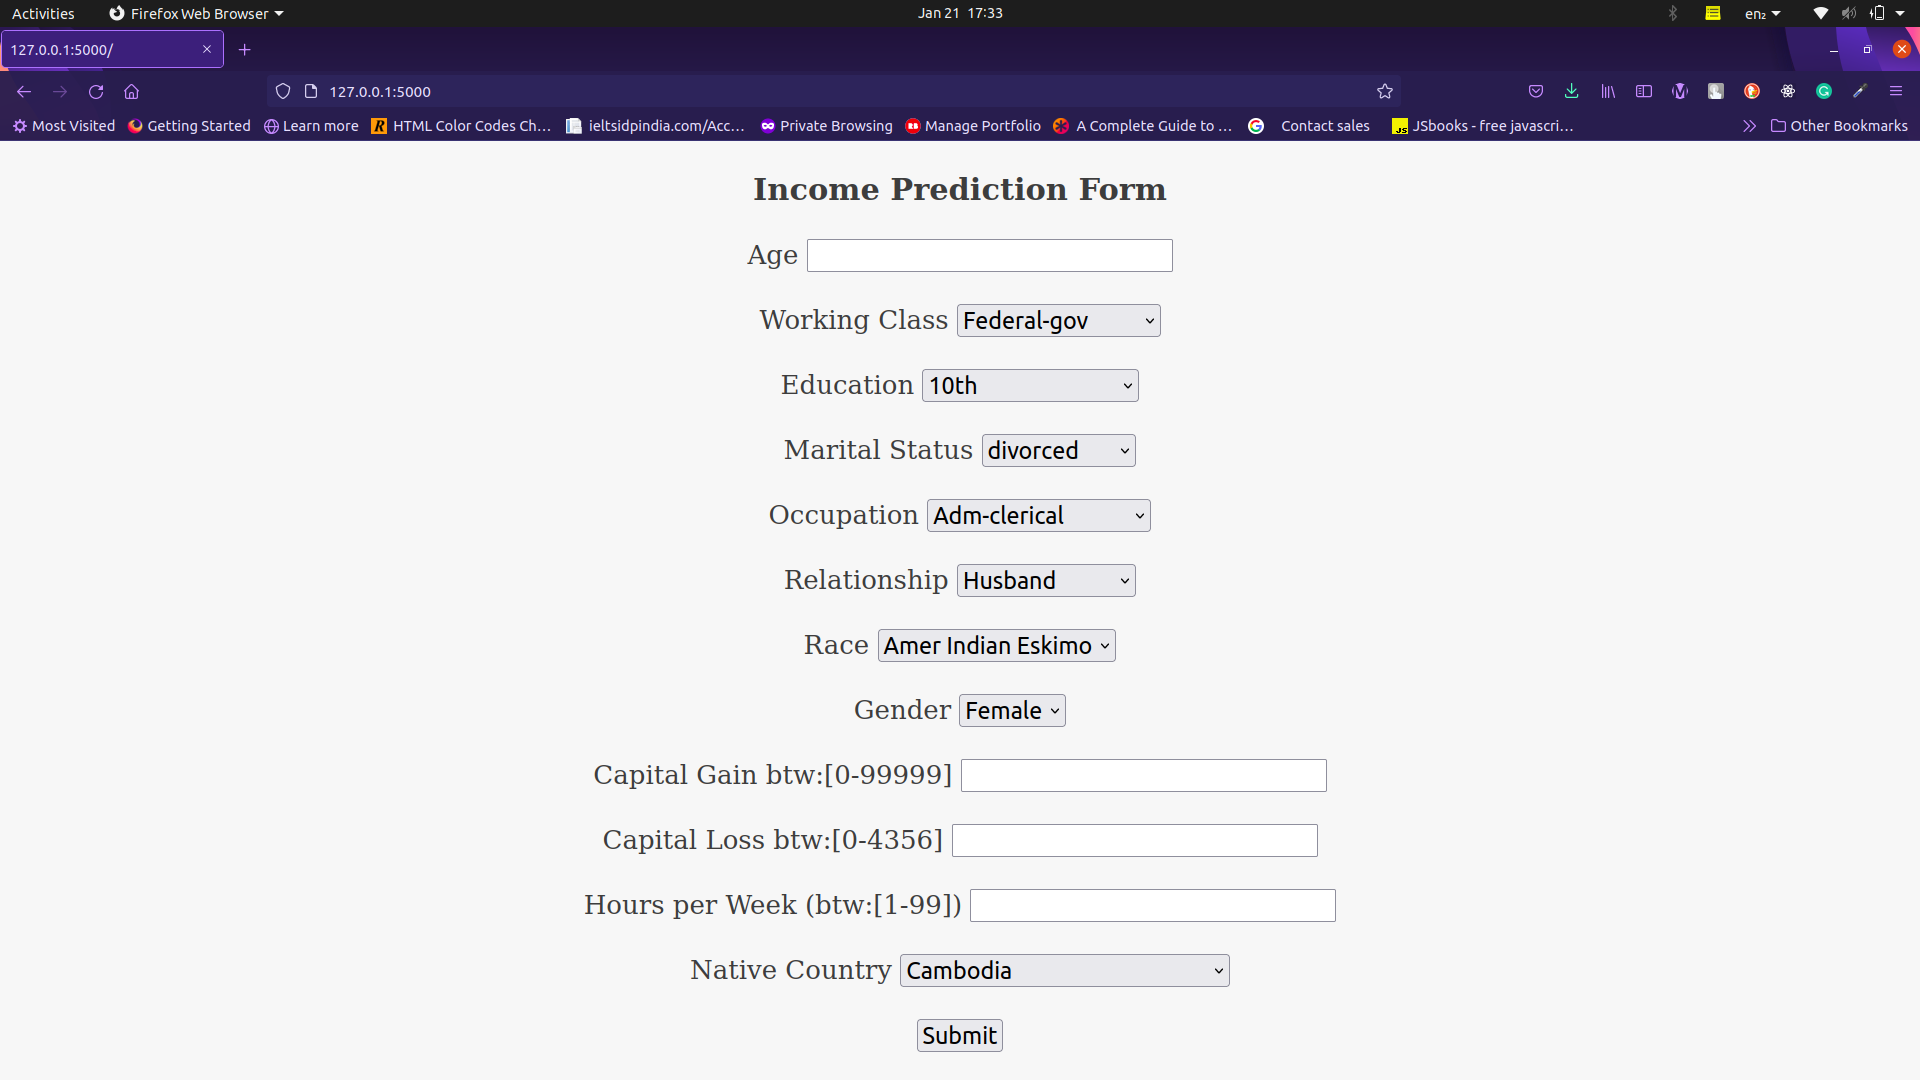

### Correct Steps to follow for Building the App and Deploying App
1.) Create the Decision Tree classifier model and prediction in Jupyter Notebook.

2.) Create the myapp.py python file in the same file as Jupyter notebook.

3.) Create a templates/ folder in this folder and create index.html in that folder. So you have /templates/index.html.

4.) Create an output.html file in templates folder as well. 

5.) Now run the .py file in command prompt or shell. 

6.) You'll get an IP address along with port in the shell. It will be of type 127.0.0.1:5000/. Copy this address and paste in your web browser. 

7.) index.html will open and you will get a form. Fill out the details in the form. We are just feeding in new features to model i.e. data which model has never encountered. 

8.) Now the model will successfully predict whether or not the income of that particular person will be >50k or <=50k.

## Thank You !